##### Carl https://www.computerhope.com/jargon/r/random-dice.jpg 7.0 [Name: IT-Security, Classroom: 1W, Teacher: Daniel, ETCS: 30, Grade: 7]
##### Hans https://hatrabbits.com/wp-content/uploads/2017/01/random.jpg 7.0 [Name: Python, Classroom: 232D, Teacher: Thomas, ETCS: 45, Grade: 12, Name: Fullstack JavaScript, Classroom: 272Z, Teacher: Lars, ETCS: 10, Grade: 2]
*****: Carl https://www.computerhope.com/jargon/r/random-dice.jpg [Name: IT-Security, Classroom: 1W, Teacher: Daniel, ETCS: 30, Grade: 7]
*****: Hans https://hatrabbits.com/wp-content/uploads/2017/01/random.jpg [Name: Python, Classroom: 232D, Teacher: Thomas, ETCS: 45, Grade: 12, Name: Fullstack JavaScript, Classroom: 272Z, Teacher: Lars, ETCS: 10, Grade: 2]


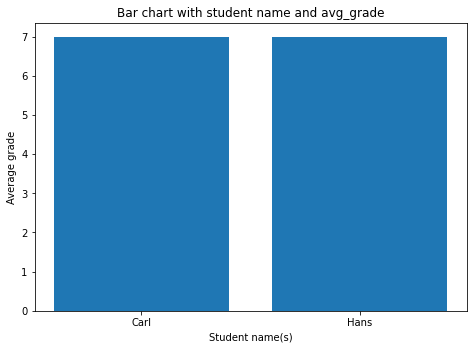

Name: Carl , Gender: Female , Courses: [Name: IT-Security, Classroom: 1W, Teacher: Daniel, ETCS: 30, Grade: 7] , Image url: https://www.computerhope.com/jargon/r/random-dice.jpg
Carl has following study progression in %: 20.0 %
Name: Hans , Gender: Male , Courses: [Name: Python, Classroom: 232D, Teacher: Thomas, ETCS: 45, Grade: 12, Name: Fullstack JavaScript, Classroom: 272Z, Teacher: Lars, ETCS: 10, Grade: 2] , Image url: https://hatrabbits.com/wp-content/uploads/2017/01/random.jpg
Hans has following study progression in %: 36.666666666666664 %


In [11]:
### Ex 1 Classes
# 1. Create 3 classes: Student, DataSheet and Course
# 2. A student has a data_sheet and a data_sheet has multiple courses in particular order
# 3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
# 4. In Student create init() so that a Student can be initiated with name, gender, data_sheet and image_url
# 5. In DataSheet create a method to get_grades_as_list()
# 6. In student create a method: get_avg_grade()
# 7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
#    A. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url
# 8. Read student data into a list of Students from a csv file:
#    A. loop through the list and print each student with name, img_url and avg_grade.
#    B. sort the list by avg_grade
#    C. create a bar chart with student_name on x and avg_grade on y-axis
# 9. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
# 10. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)
# Extra: Make the Datasheet class iterable so that next(data_sheet) will return the next course in the list
import random;
import csv;
import platform;

class Student():
    def __init__(self, name, gender, data_sheet, image_url):
        self.name = name;
        self.gender = gender;
        self.data_sheet = data_sheet;
        self.image_url = image_url;
    
    def get_avg_grade(self):
       if self.data_sheet.get_grades_as_list():
           average_grade = sum(self.data_sheet.get_grades_as_list()) / len(self.data_sheet.get_grades_as_list())
       return average_grade;

    # 9. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses 
    # divided by total of 150 total points (equivalent to 5 semesters))
    def progress_of_study_percent(self):
        result = 0
        total_points = 150
        for course in self.data_sheet.courses:
            result += course.ETCS
        result = ((result/total_points) * 100)
        return result
    

class DataSheet():
    def __init__(self, courses):
        self.courses = courses;

    def get_grades_as_list(self):
        grades_as_list = []
        for course in self.courses:
            if course.grade is not None:
                grades_as_list.append(course.grade)
        return grades_as_list;

class Course():
    def __init__(self, name, classroom, teacher, ETCS, grade=0):
        self.name = name;
        self.classroom = classroom;
        self.teacher = teacher;
        self.ETCS = ETCS;
        self.grade = grade;

    # https://www.journaldev.com/22460/python-str-repr-functions:
    # This method returns the string representation of the object. This method is called when print() or str() function is invoked on an object.
    def __str__(self):
        # due to these, we can retriev/print our courses in the general scope.
        if self.grade > 0:
            return 'Name: ' + str(self.name) + ", Classroom: " + str(self.classroom) + ", Teacher: " + str(self.teacher) + ", ETCS: " + str(self.ETCS) + ", Grade: " + str(self.grade)
        else:
            return 'Name: ' + str(self.name) + ", Classroom: " + str(self.classroom) + ", Teacher: " + str(self.teacher) + ", ETCS: " + str(self.ETCS)

    # Python __repr__() function returns the object representation in string format. This method is called when repr() function is invoked on the object. If possible, the string returned should be a valid Python expression that can be used to reconstruct the object again.
    def __repr__(self):
        return self.__str__()

# 7.A. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url
def writeToCSV(students):
    if platform.system() == 'Windows':
        newline=''
    else:
        newline=None
    
    with open('output.csv', 'w', newline=newline) as file_object:
        output_writer = csv.writer(file_object)
        
        for stud in students:
            for course in stud[0].data_sheet.courses:
                output_writer.writerow([
                stud[0].name, stud[0].gender, course.name, course.classroom, course.teacher,
                course.ETCS, course.grade, stud[0].image_url
                ])
    return students;

def readFromCSV():
    # 8. Read student data into a list of Students from a csv file:
    aStudent = Student;
    old_name = ""
    students = []

    with open('output.csv') as f:
        reader = csv.reader(f)
        coursesData = []
        for row in reader:
            # data fields:
            stud_name = row[0]
            gender = row[1]
            course_name = row[2]
            classroom = row[3]
            teacher = row[4]
            ECTS = row[5]
            grade = int(row[6])
            image_url = row[7]
            
            if stud_name != old_name: # we check if a course belongs to a certain student. if it doesn't, we make a new courseData array, instead of using the existing.
                coursesData = []
                coursesData.append(Course(course_name, classroom, teacher, ECTS, grade))
            else:
                # means that it's the same student. we consider 'name' as the uid.
                coursesData.append(Course(course_name, classroom, teacher, ECTS, grade))
                students.pop(); # remove the previous (same) student (same name), to prevent duplicates.
                
            old_name = stud_name;
            data_sheet = DataSheet(coursesData)
            aStudent = Student(stud_name, gender, data_sheet, image_url)

            students.append(aStudent)
        return students;

# #8.B. sort the list by avg_grade
def sort_students_from_grade(students):
        #students_sorted = sorted(students, key=float student.get_avg_grade(), reverse = True)
        # lamba logic based on https://stackoverflow.com/a/39005864/14928754. todo: read up on lambda.
    students_sorted = sorted(students, key=lambda student: student.get_avg_grade(), reverse=True)
    return students_sorted

#8.C. create a bar chart with student_name on x and avg_grade on y-axis
import matplotlib.pyplot as plt
#%%matplotlib notebook
# note: it looks weird when only 1 result. need to adjust width. 
def bar_chart_student(students):
    fig = plt.figure()
    width = 0.35  # the width of the bars
    ax = fig.add_axes([0, 0, 1, 1])
    x_value = [student.name for student in students]
    y_value = [student.get_avg_grade() for student in students]
    ax.bar(x_value, y_value)
    ax.set_title('Bar chart with student name and avg_grade')
    ax.set_ylabel('Average grade')
    ax.set_xlabel('Student name(s)')
    plt.show()
        
# 7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
def random_students(amount):
    student_list = []
    for amount_entries in range(amount):
        random_names = ['Hans', 'Ingrid', 'Carl']
        random_gender = ['Male', 'Female']
        random_grades = [0, 2, 4, 7, 10, 12]
        random_images = ['https://hatrabbits.com/wp-content/uploads/2017/01/random.jpg', 'https://www.computerhope.com/jargon/r/random-dice.jpg']
        random_courses = [
        Course('Fullstack JavaScript', '272Z', 'Lars', 10, random.choice(random_grades)), 
        Course('IT-Security', '1W', 'Daniel', 30, random.choice(random_grades)),
        Course('Python', '232D', 'Thomas', 45, random.choice(random_grades))
        ]
        
        ## this code-block prevents duplicates on the randomizing
        student_courses = []
        for r in range(random.randrange(1, len(random_courses))):
            rand_course = random.choice(random_courses)
            if rand_course not in student_courses:
                student_courses.append(rand_course)
        random_student = [Student(random.choice(random_names), random.choice(random_gender), DataSheet(student_courses), random.choice(random_images))]
        
        student_list.append(random_student)

        writeToCSV(student_list)
        
        # 8.
        students = readFromCSV()

    # 8.A. loop through the list and print each student with name, img_url and avg_grade.
    for student in students:
       print("#####", student.name, student.image_url, student.get_avg_grade(), student.data_sheet.courses)
    
    #8.B. sort the list by avg_grade
    sortedList = sort_students_from_grade(students)
    for sort in sortedList:
        print("*****:", sort.name, sort.image_url, sort.data_sheet.courses)

    #8.C. create a bar chart with student_name on x and avg_grade on y-axis
    # note: it looks weird when only 1 result. need to adjust width. 
    bar_chart_student(students)
    
    
    return student_list;

student_list = random_students(2)

# for 1.7, just to show that it matches the CSV file.
for stud in student_list:
    print("Name:", stud[0].name, ", Gender:", stud[0].gender, ", Courses:", stud[0].data_sheet.courses, ", Image url:", stud[0].image_url)
    print(stud[0].name, "has following study progression in %:", stud[0].progress_of_study_percent(), "%")
